<a href="https://colab.research.google.com/github/Parth7/ML-for-finance/blob/main/NN_VAR_data_nevena_model_1_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib
import random
print(tf.__version__)

2.5.0


In [3]:
from google.colab import files
uploaded = files.upload()

Saving cummulative_data.xls to cummulative_data.xls


In [4]:
file = pd.read_excel('cummulative_data.xls') 
# Data for three-dimensional scattered points


#(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
#train_mean = np.mean(train_features, axis=0)
#train_std = np.std(train_features, axis=0)
#train_features = (train_features - train_mean) / train_std

In [5]:
file = file.to_numpy()

In [6]:
file[:10]

array([[ 13.992114  ,  13.99      ,  -8.85993485,  25.        ,
         10.        ],
       [ 13.930585  ,  13.93      ,  -9.25081433,  25.        ,
         10.        ],
       [ 13.809978  ,  13.81      , -10.03257329,  25.        ,
         10.        ],
       [ 13.911977  ,  13.91      ,  -9.38110749,  25.        ,
         10.        ],
       [ 13.810281  ,  13.81      , -10.03257329,  25.        ,
         10.        ],
       [ 13.961872  ,  13.96      ,  -9.05537459,  25.        ,
         10.        ],
       [ 14.06189   ,  14.06      ,  -8.40390879,  25.        ,
         10.        ],
       [ 13.994377  ,  13.99      ,  -8.85993485,  25.        ,
         10.        ],
       [ 13.922221  ,  13.92      ,  -9.31596091,  25.        ,
         10.        ],
       [ 13.952919  ,  13.95      ,  -9.12052117,  25.        ,
         10.        ]])

In [7]:
np.random.shuffle(file) 

In [8]:
file[:10]

array([[ 19.89551   ,  19.9       ,  29.64169381,  25.        ,
        -20.        ],
       [  9.06723269,   9.07      , -40.91205212, 100.        ,
        -30.        ],
       [ 16.873892  ,  16.87      ,   9.90228013, 125.        ,
         40.        ],
       [ 12.76438   ,  12.76      , -16.87296417,  25.        ,
         20.        ],
       [ 17.28801614,  17.29      ,  12.63843648,  75.        ,
         20.        ],
       [ 15.29961068,  15.3       ,  -0.3257329 , 125.        ,
         50.        ],
       [ 11.27616147,  11.28      , -26.51465798, 100.        ,
        -20.        ],
       [ 16.361158  ,  16.36      ,   6.57980456,  50.        ,
         50.        ],
       [ 11.35438612,  11.35      , -26.05863192, 100.        ,
        -20.        ],
       [ 13.5592047 ,  13.56      , -11.66123779, 100.        ,
        -10.        ]])

In [9]:
file[:,0]

array([19.89551   ,  9.06723269, 16.873892  , ..., 15.27988   ,
       15.46991798, 19.3628    ])

In [10]:
zdata = file[:,0]
xdata = file[:,1]
ydata = file[:,2]

data = np.array([xdata,ydata])
zd = np.array([zdata])

In [11]:
test_set_size = int(np.round(0.2*data.shape[1]));
train_set_size = data.shape[1] - (test_set_size);

In [12]:
x_train = data[:,:train_set_size]
y_train = zd[:,:train_set_size]

x_test = data[:,train_set_size:]
y_test = zd[:,train_set_size:]

In [13]:
x_train[:15]

array([[ 19.9       ,   9.07      ,  16.87      , ...,  16.71      ,
         14.57      ,  18.7       ],
       [ 29.64169381, -40.91205212,   9.90228013, ...,   8.85993485,
         -5.08143322,  21.82410423]])

In [14]:
train_features = x_train

In [15]:
y_train.T.shape

(8000, 1)

In [16]:
x_train.T.shape

(8000, 2)

In [17]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [18]:
#Define training hyperprameters.
batch_size = 50
num_epochs = 200
learning_rate = 0.01
size_hidden= 20

#Calculate some other hyperparameters based on data.  
batch_no = len(x_train) // batch_size  #batches
cols=x_train.shape[1] #Number of columns in input matrix
n_output=1

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

#build our model
model = Sequential()

model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(
    x_train,
    y_train,
    epochs=50,
    shuffle=True,
    verbose=2
)

Epoch 1/50
250/250 - 20s - loss: 11.4008
Epoch 2/50
250/250 - 0s - loss: 0.0017
Epoch 3/50
250/250 - 0s - loss: 5.7758e-04
Epoch 4/50
250/250 - 0s - loss: 3.5022e-04
Epoch 5/50
250/250 - 0s - loss: 2.5829e-04
Epoch 6/50
250/250 - 0s - loss: 1.8135e-04
Epoch 7/50
250/250 - 0s - loss: 2.1165e-04
Epoch 8/50
250/250 - 0s - loss: 1.5067e-04
Epoch 9/50
250/250 - 0s - loss: 1.3559e-04
Epoch 10/50
250/250 - 0s - loss: 1.6210e-04
Epoch 11/50
250/250 - 0s - loss: 0.0024
Epoch 12/50
250/250 - 0s - loss: 0.0042
Epoch 13/50
250/250 - 0s - loss: 2.1296e-04
Epoch 14/50
250/250 - 0s - loss: 0.0018
Epoch 15/50
250/250 - 0s - loss: 0.0108
Epoch 16/50
250/250 - 0s - loss: 0.0012
Epoch 17/50
250/250 - 0s - loss: 0.0490
Epoch 18/50
250/250 - 0s - loss: 0.0037
Epoch 19/50
250/250 - 0s - loss: 0.0013
Epoch 20/50
250/250 - 0s - loss: 0.0038
Epoch 21/50
250/250 - 0s - loss: 8.4210e-04
Epoch 22/50
250/250 - 0s - loss: 0.0015
Epoch 23/50
250/250 - 0s - loss: 0.0671
Epoch 24/50
250/250 - 0s - loss: 0.0069
Epoch 2

In [21]:
x_test[1].T

array([19.88      , 29.51140065])

In [22]:
x_test[0:1]

array([[ 11.81      , -23.06188925]])

In [23]:
y_test[0:1]

array([[11.80661512]])

In [24]:
a = [1,2,3,4,5,6,7,8,9];
for i in a: 
  prediction = model.predict(x_test[i-1:i])
  y_0 = prediction[0][0]
  print('Prediction - {}',format(y_0))
  print('Actual',y_test[i-1:i])

Prediction - {} 11.815061569213867
Actual [[11.80661512]]
Prediction - {} 19.879182815551758
Actual [[19.88055]]
Prediction - {} 16.617868423461914
Actual [[16.622659]]
Prediction - {} 25.440837860107422
Actual [[25.43429]]
Prediction - {} 13.112648963928223
Actual [[13.11287093]]
Prediction - {} 7.378021240234375
Actual [[7.36817977]]
Prediction - {} 31.368268966674805
Actual [[31.36227]]
Prediction - {} 18.200103759765625
Actual [[18.19753796]]
Prediction - {} 15.230513572692871
Actual [[15.23045422]]


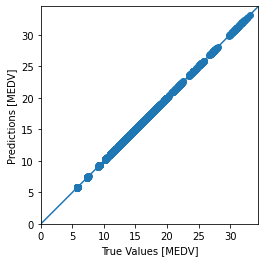

In [25]:
test_predictions = model.predict(x_test).flatten()
train_predictions = model.predict(x_train).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [39]:
error = np.zeros(1000)
for i in range(1000):
  error[i] = test_predictions[i] - y_test[i]

In [40]:
error[:10]

array([ 8.44644921e-03, -1.36718445e-03, -4.79248389e-03,  6.54595276e-03,
       -2.21012397e-04,  9.84146623e-03,  5.99896667e-03,  2.56579977e-03,
        6.03063672e-05,  9.78450317e-04])

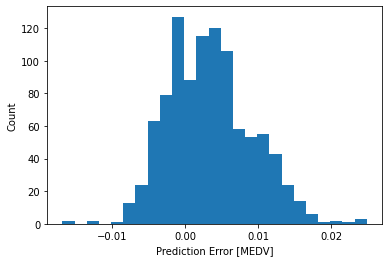

In [41]:

plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_predictions)
print('Mean Squared Error: ',mse)
mae = mean_absolute_error(y_test, test_predictions)
print('Mean Absolute Error: ',mae)
rsq = r2_score(y_train,train_predictions) #R-Squared on the training data
print('R-square, Training: ',rsq)
rsq = r2_score(y_test,test_predictions) #R-Squared on the testing data
print('R-square, Testing: ',rsq)

Mean Squared Error:  4.210483163115769e-05
Mean Absolute Error:  0.0050110829607985805
R-square, Training:  0.9999984057224688
R-square, Testing:  0.9999982102396302
